# LogisticRegression Model of Affair Dataset

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

In [85]:
#Required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [86]:
affair_data = sm.datasets.fair.load_pandas().data
affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [87]:
affair_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [88]:
# add "affair" column: 1 represents having affairs, 0 represents not
affair_data['affair'] = (affair_data.affairs > 0).astype(int)
affair_data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [89]:
#distinct rate_marriage
affair_data['rate_marriage'].unique()

array([3., 4., 5., 2., 1.])

In [90]:
#Women who have affairs have rated less as compared to who don;t have affairs which is expected.
#And also from below as age,yrs_married,children increases which show decline in low rating.
affair_data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


# DATA Visualization

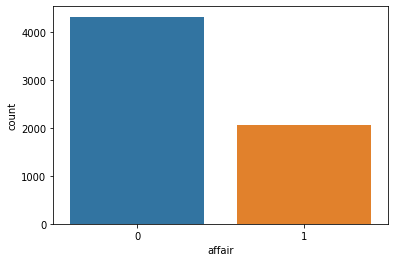

In [91]:
#comparing Having Affair and non-affair
sns.countplot(x='affair',data=affair_data)

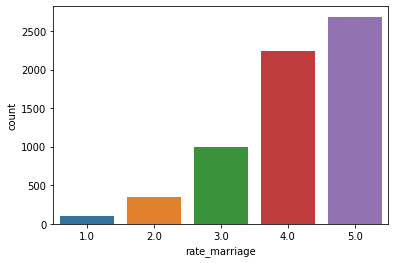

In [92]:
#rate of the marriage comparision
sns.countplot(x='rate_marriage',data=affair_data)

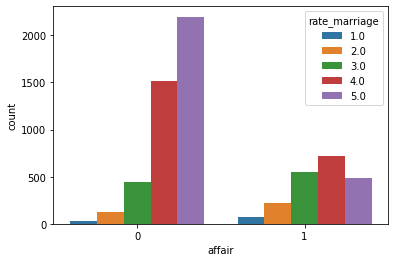

In [93]:
#Comparing affair over rate_marriage count.
sns.countplot(x='affair',hue='rate_marriage',data=affair_data)

In [94]:
#unique value of age
affair_data['age'].unique()

array([32. , 27. , 22. , 37. , 42. , 17.5])

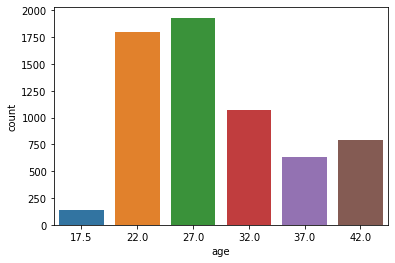

In [95]:
#plot for number of each age people count
sns.countplot(x='age',data=affair_data)

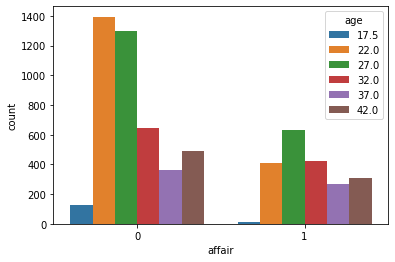

In [96]:
#Comparing affair over age count.
sns.countplot(x='affair',hue='age',data=affair_data)

In [97]:
#unique value of no.of children
affair_data['children'].unique()

array([3. , 0. , 4. , 1. , 5.5, 2. ])

from above we can see that person having 5.5 children which is not possible.
so we have to replace this value to 5 or if it has containg in few rows the simply delete it.

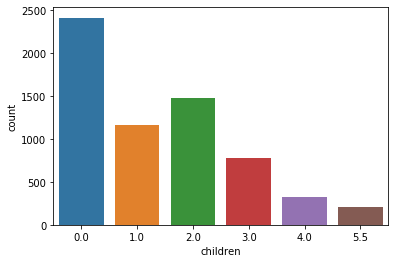

In [98]:
#count plot of children
sns.countplot(x='children',data=affair_data)

In [99]:
affair_data.shape

(6366, 10)

In [100]:
#Replacing the value of 5.5 by 5
affair_data["children"].replace({5.5: 5}, inplace=True)
affair_data['children'].unique()

array([3., 0., 4., 1., 5., 2.])

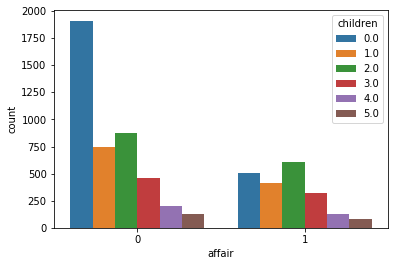

In [101]:
#Comparing affair over no of children count.
sns.countplot(x='affair',hue='children',data=affair_data)

Text(0, 0.5, 'count')

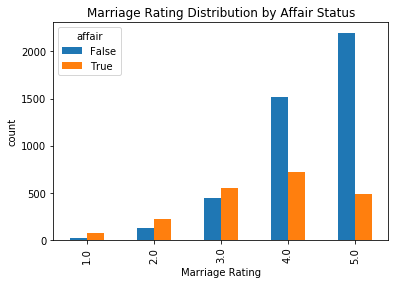

In [102]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(affair_data.rate_marriage, affair_data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('count')

Text(0, 0.5, 'count')

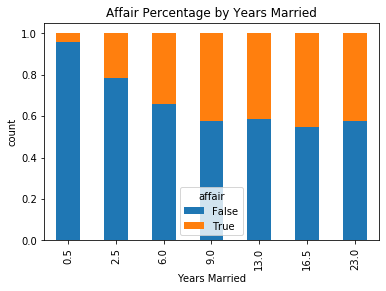

In [103]:
#Comparing the affair over yrs_married
yrs_married_affair = pd.crosstab(affair_data.yrs_married, affair_data.affair.astype(bool))
yrs_married_affair.div(yrs_married_affair.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('count')

In [104]:
#finding null value in dataset
affair_data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

from above it is clear that there is no null value in dataset.

# Prepare Data for Logistic Regression

In [105]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
from patsy import dmatrices
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [106]:
#Renaming of the columns
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [107]:
# flatten y into a 1-D array
y = np.ravel(y)

In [129]:
#Splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [130]:
#importing and initializing of the Logidtic Model
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()
lgmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
prediction=lgmodel.predict(X_test)

In [132]:
Result=pd.DataFrame(data=[prediction,y_test],index={'Actual','Predicted'})
Result.T

,Predicted,Actual
0,1.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1587,1.0,0.0
1588,0.0,0.0
1589,0.0,0.0
1590,0.0,0.0


In [133]:
#classification report
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.89      0.82      1086\n         1.0       0.62      0.38      0.47       506\n\n    accuracy                           0.73      1592\n   macro avg       0.69      0.64      0.65      1592\nweighted avg       0.71      0.73      0.71      1592\n'

In [134]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[970, 116],
       [313, 193]], dtype=int64)

In [135]:
#Accurrecy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

73.05276381909547